getteting data from photots

In [104]:
import PIL as PIL
from PIL import Image, ImageDraw, ImageOps, ImageFilter, ImageEnhance

def crop_image(image_path, crop_box):
    image = Image.open(image_path)
    
    cropped = image.crop(crop_box)
    # image = pad_image(image, 1000)
    # image = apply_contrast(image, )
    
    return cropped

def rotate_image(image, angle):
    return image.rotate(angle, expand=True)

def pad_image(image, padding):
    return ImageOps.expand(image, border=padding, fill='white')

def apply_contrast(image, factor):
    enhancer = ImageEnhance.Contrast(image)
    return enhancer.enhance(factor)

x = 130
y = 250
w = 400
h = 350
rotate = 0

cropped_img = crop_image(r"C:\Users\kianf\OneDrive - University of Cape Town\2024_EEE4022S_Kian_Frassek_Halbach_Array\code\image back up\y big 2\captured_image_1.jpg", (x, y, w, h))
cropped_img.show()

for i in range(0, 99):
    cropped_img = crop_image(r"C:\Users\kianf\OneDrive - University of Cape Town\2024_EEE4022S_Kian_Frassek_Halbach_Array\code\image back up\y big 2\captured_image_{}.jpg".format(i), (x, y, w, h))
    cropped_img.save(r"C:\Users\kianf\OneDrive - University of Cape Town\2024_EEE4022S_Kian_Frassek_Halbach_Array\code\image back up\y big 2 crop\cropped_image_{}.jpg".format(i))


def combine_images_vertically(image_paths, output_path):
    # Open all images and get their sizes
    images = [Image.open(path) for path in image_paths]
    widths, heights = zip(*(img.size for img in images))

    # Calculate the total height and the maximum width
    total_height = sum(heights)
    max_width = max(widths)

    # Create a new blank image with the calculated dimensions
    combined_image = Image.new('RGB', (max_width, total_height))

    # Paste each image into the combined image
    y_offset = 0
    for img in images:
        combined_image.paste(img, (0, y_offset))
        y_offset += img.height

    # Save the combined image
    combined_image.save(output_path)



    # List of image paths to combine
image_paths = [r"C:\Users\kianf\OneDrive - University of Cape Town\2024_EEE4022S_Kian_Frassek_Halbach_Array\code\image back up\y big 2 crop\cropped_image_{}.jpg".format(i) for i in range(0,99)]

    # Output path for the combined image
output_path = r"C:\Users\kianf\OneDrive - University of Cape Town\2024_EEE4022S_Kian_Frassek_Halbach_Array\code\image back up\y big 2 crop\combined_image.jpg"

    # Combine the images
combine_images_vertically(image_paths, output_path)


In [14]:
from PIL import Image, ImageFilter

img = Image.open(r"C:\Users\kianf\OneDrive - University of Cape Town\2024_EEE4022S_Kian_Frassek_Halbach_Array\code\image back up\images x 2 crop\cropped_image_3.jpg")

# Converting the image to grayscale, as Sobel Operator requires
# input image to be of mode Grayscale (L)
img = img.convert("L")

# Calculating Edges using the passed laplacian Kernel with increased thickness
# Apply the kernel to detect edges
edges = img.filter(ImageFilter.Kernel((3, 3), (-4, -4, -4, -4, 16*2, -4, -4, -4, -4), 0, 1))

# Convert edges to binary image
edges = edges.point(lambda p: p > 128 and 255)

# Create a new image to fill the outlines
filled = Image.new("L", img.size, 0)

# Draw the filled outlines
draw = ImageDraw.Draw(filled)
for y in range(img.height):
    for x in range(img.width):
        if edges.getpixel((x, y)) == 255:
            draw.point((x, y), fill=255)

# Combine the original image with the filled outlines
final = ImageChops.add(img, filled)



final.save("EDGE_sample.png")


NameError: name 'ImageChops' is not defined

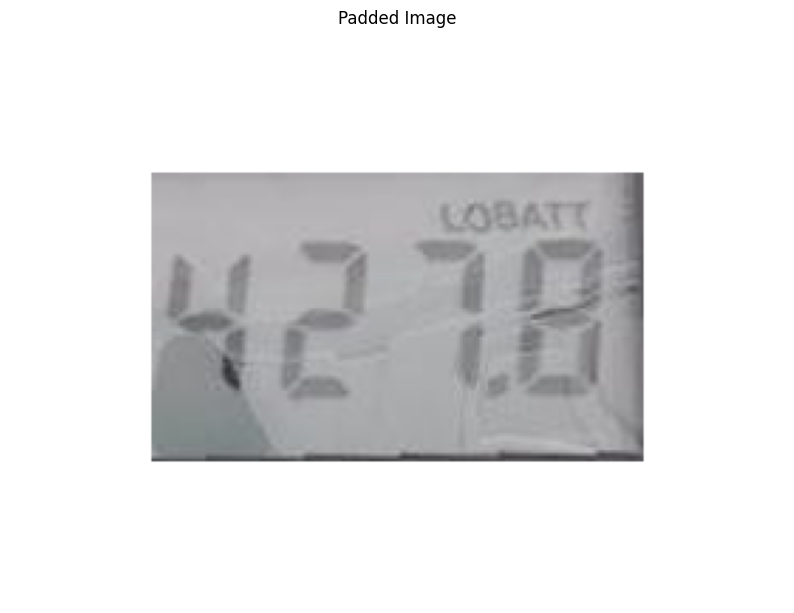

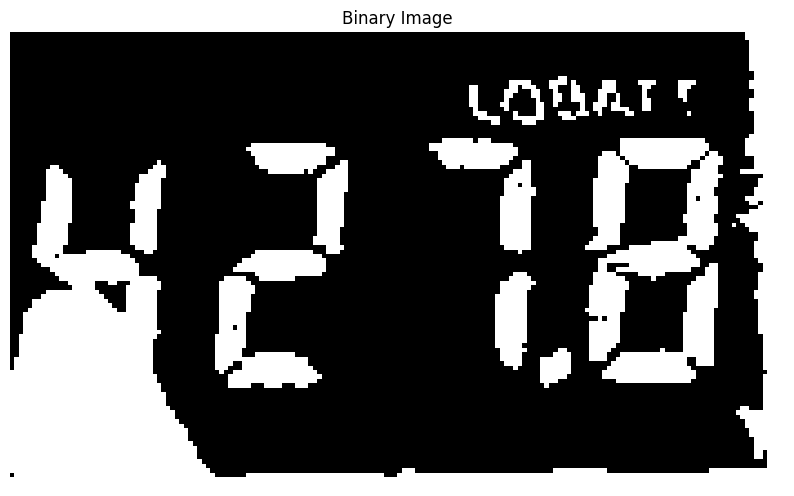

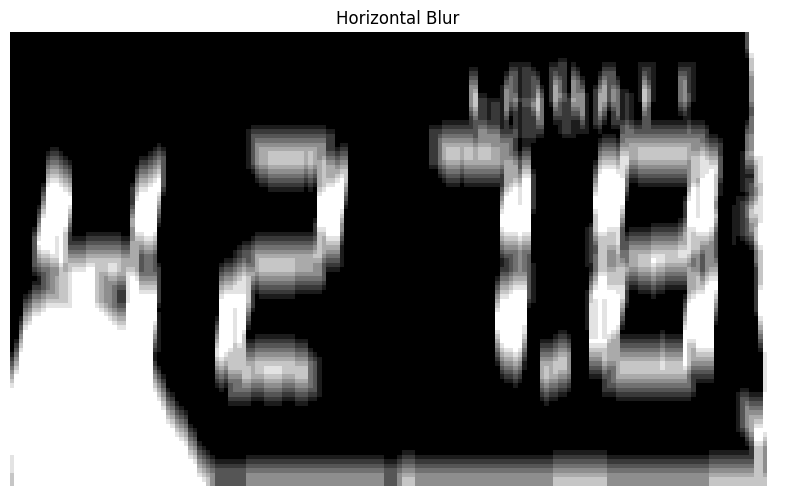

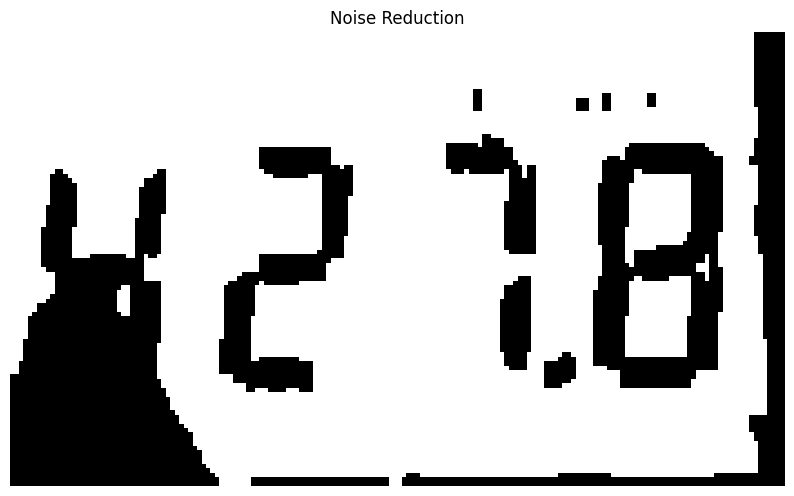

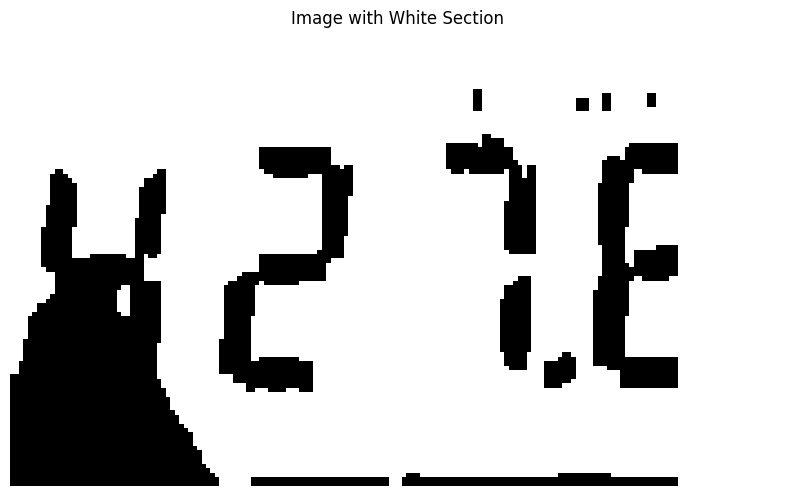

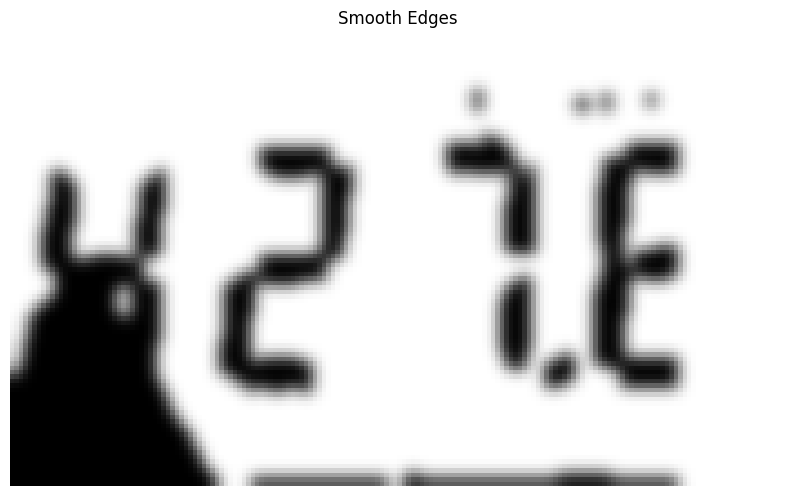

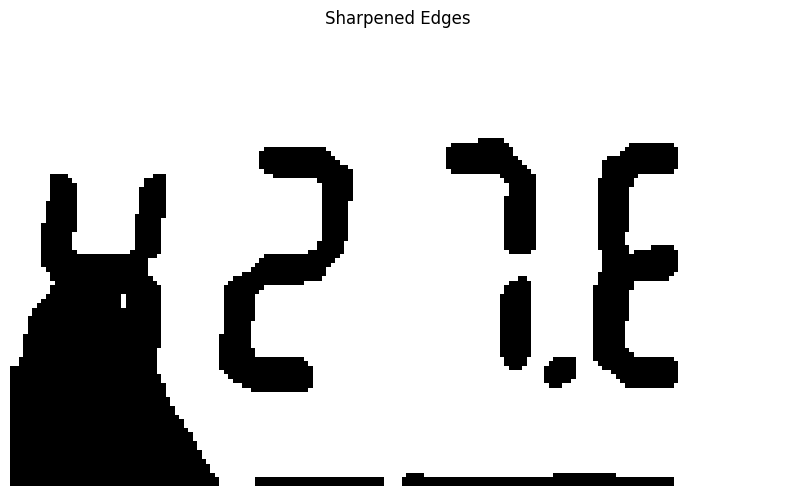

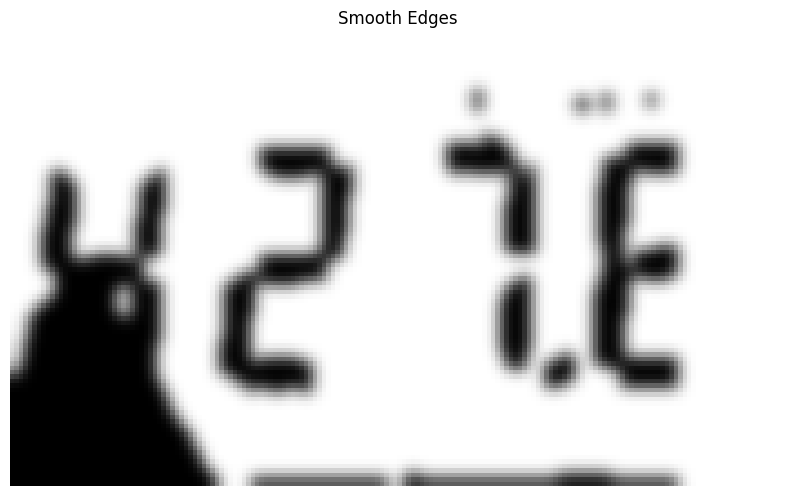

In [23]:
import cv2
import pytesseract
import numpy as np
import re
import matplotlib.pyplot as plt

# Function to plot the image
def plot_image(image, title="Image"):
    plt.figure(figsize=(10, 10))
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title(title)
    plt.axis('off')
    plt.show()

# 1. Load the image
image = cv2.imread(r"C:\Users\kianf\OneDrive - University of Cape Town\2024_EEE4022S_Kian_Frassek_Halbach_Array\code\image back up\images x 2 crop\cropped_image_4.jpg") 

# Increase the size of the image
image = cv2.resize(image, None, fx=1.2, fy=1.2, interpolation=cv2.INTER_CUBIC)



# # Apply contrast enhancement
# alpha = 2  # Simple contrast control
# beta = 0     # Simple brightness control

# # The function addWeighted calculates the weighted sum of two arrays
# contrast = cv2.convertScaleAbs(gray, alpha=alpha, beta=beta)
# plot_image(contrast, "Contrast Enhanced Image")

# Pad the image with white
top, bottom, left, right = [50]*4
image_padded = cv2.copyMakeBorder(image, top, bottom, left, right, cv2.BORDER_CONSTANT, value=[255, 255, 255])
plot_image(image_padded, "Padded Image")

# 2. Preprocessing
#    - Convert to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
#    - Thresholding (to create a binary image)
ret, thresh = cv2.threshold(gray, 80, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)

plot_image(thresh, "Binary Image")

# Apply horizontal blur

kernel = (1, 9)  # Horizontal kernel 
blurred_img = cv2.blur(thresh, kernel) 
plot_image(blurred_img, "Horizontal Blur")

# 3. Noise reduction (optional, but often helpful)
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (2, 2))
opening = cv2.morphologyEx(blurred_img, cv2.MORPH_OPEN, kernel)

# Define the threshold value
threshold_value = 130

# Apply the threshold to make all values below the threshold white and above the threshold black
opening = cv2.threshold(opening, threshold_value, 255, cv2.THRESH_BINARY_INV)[1]

plot_image(opening, "Noise Reduction")

# Define the coordinates for the section to be made white
start_x, start_y = 100, 0
end_x, end_y = 1000, 10

# Make the specified section white
opening[start_y:end_y, start_x:end_x] = [255]

# Define the coordinates for the section to be made white
start_x, start_y = 150, 0
end_x, end_y = 1000, 1000

# Make the specified section white
opening[start_y:end_y, start_x:end_x] = [255]

# Plot the modified image
plot_image(opening, "Image with White Section")

# Apply Gaussian Blur to smooth the edges
smooth_edges = cv2.GaussianBlur(opening, (9, 9), 0)
plot_image(smooth_edges, "Smooth Edges")

# Apply thresholding again to the smooth edges
ret, sharpened_edges = cv2.threshold(smooth_edges, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
plot_image(sharpened_edges, "Sharpened Edges")

# Apply Gaussian Blur to smooth the edges
smooth_edges = cv2.GaussianBlur(opening, (9, 9), 0)
plot_image(smooth_edges, "Smooth Edges")





# 4.  OCR with pytesseract
text = pytesseract.image_to_string(sharpened_edges, config='--psm 6 -c tessedit_char_whitelist=0123456789.') 

# Add a dot between the last two numbers in the recognized text

# Use regex to find the last two numbers and add a dot between them
text = re.sub(r'(\d)(\d)$', r'\1.\2', text)

# 5. Print the recognized text
print(text)




In [192]:
import os
import cv2
import pytesseract
import numpy as np
import re
import matplotlib.pyplot as plt

def process_image(image_path):
    # 1. Load the image
    image = cv2.imread(image_path) 


    # Increase the size of the image
    image = cv2.resize(image, None, fx=1.2, fy=1.2, interpolation=cv2.INTER_CUBIC)
    



    # Pad the image with white
    top, bottom, left, right = [50]*4
    image_padded = cv2.copyMakeBorder(image, top, bottom, left, right, cv2.BORDER_CONSTANT, value=[255, 255, 255])
    

    # 2. Preprocessing
    #    - Convert to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    #    - Thresholding (to create a binary image)
    ret, thresh = cv2.threshold(gray, 0, 299, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU) 

    

    # Apply horizontal blur

    kernel = (1, 9)  # Horizontal kernel 
    blurred_img = cv2.blur(thresh, kernel) 
    

    # 3. Noise reduction (optional, but often helpful)
    kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (2, 2))
    opening = cv2.morphologyEx(blurred_img, cv2.MORPH_OPEN, kernel)

    # Define the threshold value
    threshold_value = 130

    # Apply the threshold to make all values below the threshold white and above the threshold black
    opening = cv2.threshold(opening, threshold_value, 255, cv2.THRESH_BINARY_INV)[1]

    # Define the coordinates for the section to be made white
    start_x, start_y = 100, 0
    end_x, end_y = 1000, 10

    # Make the specified section white
    opening[start_y:end_y, start_x:end_x] = [255]

    # Define the coordinates for the section to be made white
    start_x, start_y = 150, 0
    end_x, end_y = 1000, 1000

    # Make the specified section white
    opening[start_y:end_y, start_x:end_x] = [255]

    # Apply Gaussian Blur to smooth the edges
    smooth_edges = cv2.GaussianBlur(opening, (9, 9), 0)

    # Apply thresholding again to the smooth edges
    ret, sharpened_edges = cv2.threshold(smooth_edges, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
    

    # Apply Gaussian Blur to smooth the edges
    smooth_edges = cv2.GaussianBlur(opening, (9, 9), 0)

    # Save the smooth_edges image
    cv2.imwrite(os.path.join("image back up", "images x 1 crop", f"processed_image_{i}.jpg"), smooth_edges)


    
   
    # 4.  OCR with pytesseract
    text = pytesseract.image_to_string(smooth_edges, config='--psm 6 -c tessedit_char_whitelist=0123456789.') 

    # Add a dot between the last two numbers in the recognized text

    # Use regex to find the last two numbers and add a dot between them
    text = re.sub(r'(\d)(\d)$', r'\1,\2', text)
    # Remove newline character at the end of the text if present
    if text.endswith('\n'):
        text = text[:-1]

    # 5. Print the recognized text
    
    return text






# Initialize an empty list to store the recognized text from each image
recognized_texts = []

# Loop through the 100 images and process each one
for i in range(0,99):
    
    image_path = os.path.join("image back up","images x 1 crop", f"cropped_image_{i}.jpg")
    text = process_image(image_path)
    print(text)
    recognized_texts.append(text)

# Convert the list to a numpy array
recognized_texts_array = np.array(recognized_texts)
print(recognized_texts_array)




484,3
414,8
389,4
398,5
42,4
426,6
386,4
3733,5
398.3
463,4
456,4
393,6
363,2
3715,5
422,0
494,3
384,0
316,8
40,2
46,4
486,6
444,4
395,8
401,3
461,9

493.1
44,4
49,4
53,3
3,5
410,9
42,1
471,0
31,8
30,6
418,2
446,6
42,5
494,5
235,2
516,4
463,1
449,3
412,8
534,6
56.2
4,8
466,6
48,2
55,8
56,2
03,5
486,5
51,2
61,6
561,5
496,2
472,5
466,4
54,2
33,9
481,5
468,5
494.
562,8
73,5
03,3
416.2
48,2
333,9
53,2
01,4
496,6
56,2
606.1
564,3
495.
465,0
466,4

4893,9
453,0
448,6
475,0
538,9
58,8
461,6
442,3
445,6
416.2
481,3
451,8
443,5
456,0
482,9
35,2
34,1
416,5
['484,3' '414,8' '389,4' '398,5' '42,4' '426,6' '386,4' '3733,5' '398.3'
 '463,4' '456,4' '393,6' '363,2' '3715,5' '422,0' '494,3' '384,0' '316,8'
 '40,2' '46,4' '486,6' '444,4' '395,8' '401,3' '461,9' '' '493.1' '44,4'
 '49,4' '53,3' '3,5' '410,9' '42,1' '471,0' '31,8' '30,6' '418,2' '446,6'
 '42,5' '494,5' '235,2' '516,4' '463,1' '449,3' '412,8' '534,6' '56.2'
 '4,8' '466,6' '48,2' '55,8' '56,2' '03,5' '486,5' '51,2' '61,6' '561,5'
 '496,2' 

In [191]:
import numpy as np

values = [
    484.3, 414.8, 389.4, 398.5, 452.4, 428.6, 380.4, 373.5, 398.3, 463.4, 456.4, 393.6, 369.2, 375.5, 422.0, 434.3, 384.0, 376.8, 400.2, 464.4, 488.6, 417.4, 395.0, 407.3, 467.9, 571.7, 499.1, 474.4, 491.1, 553.3, 531.5, 470.9, 452.7, 471.0, 531.8, 530.6, 478.2, 446.6, 452.5, 494.5, 525.2, 516.4, 463.7, 449.3, 472.8, 534.6, 556.2, 487.7, 466.6, 488.2, 555.0, 561.2, 503.5, 488.5, 515.2, 587.6, 567.5, 498.2, 472.5, 486.4, 541.2, 533.9, 481.5, 468.5, 494.1, 562.8, 573.5, 503.3, 416.2, 488.2, 539.9, 559.2, 507.4, 496.6, 526.2, 600.7, 564.3, 495.1, 465.0, 468.4, 507.4, 489.9, 453.0, 448.6, 475.0, 538.9, 528.8, 467.6, 442.3, 445.6, 476.2, 487.3, 457.8, 443.5, 450.0, 482.9, 535.2, 534.7, 478.5
]

values_array = np.array(values)
print(values_array)

def save_to_file(filename, data):
    with open(filename, 'w') as file:
        file.write(str(data))

for i in range(0, 99):
    save_to_file("values_{}.txt".format(i), values[i])


[484.3 414.8 389.4 398.5 452.4 428.6 380.4 373.5 398.3 463.4 456.4 393.6
 369.2 375.5 422.  434.3 384.  376.8 400.2 464.4 488.6 417.4 395.  407.3
 467.9 571.7 499.1 474.4 491.1 553.3 531.5 470.9 452.7 471.  531.8 530.6
 478.2 446.6 452.5 494.5 525.2 516.4 463.7 449.3 472.8 534.6 556.2 487.7
 466.6 488.2 555.  561.2 503.5 488.5 515.2 587.6 567.5 498.2 472.5 486.4
 541.2 533.9 481.5 468.5 494.1 562.8 573.5 503.3 416.2 488.2 539.9 559.2
 507.4 496.6 526.2 600.7 564.3 495.1 465.  468.4 507.4 489.9 453.  448.6
 475.  538.9 528.8 467.6 442.3 445.6 476.2 487.3 457.8 443.5 450.  482.9
 535.2 534.7 478.5]
